<a href="https://colab.research.google.com/github/caioeserpa/Portifolio/blob/main/C.E.S.A.R/%5BCAIO_SERPA%5D_PROJETO_%26_DESAFIO_SEGUNDA_CHAMADA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJETO & DESAFIO 

## **Análise de Clusters e Redução de Dimensionalidade**

---
*segunda chamada*
---
**Análise de dados no dataset: California Housing**

**Aluno: Caio Emanoel Serpa Lopes**


# Importando Dataset e Análise inicial


In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
california_housings = fetch_california_housing(as_frame=True)

california_housings

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [ ]:
print(california_housings.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [ ]:
c_housings_df = pd.DataFrame(california_housings.data, columns= california_housings.feature_names)
c_housings_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
c_housings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


#Variáveis a serem estudadas na base de dados

- MedInc
- AveBedrms
- AveRoom

Objetivo: Encontrar um padrão entre a média de casas com a variabilidade de quantidade ed quartos e quantidade de salas.

In [ ]:
#O tipo de dado que vem do sklearn no dataset é sklearn.utils.Bunch
features_df = c_housings_df[['MedInc', 'AveBedrms','AveRooms']]
features_df.describe()

,MedInc,AveBedrms,AveRooms
count,20640.000000,20640.000000,20640.000000
mean,3.870671,1.096675,5.429000
std,1.899822,0.473911,2.474173
min,0.499900,0.333333,0.846154
25%,2.563400,1.006079,4.440716
50%,3.534800,1.048780,5.229129
75%,4.743250,1.099526,6.052381
max,15.000100,34.066667,141.909091


#Clusterizando os dados e Verificando K-Ideal através do Método de Elbow

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(init= 'k-means++',
                n_clusters=25,
                n_init=10,
                max_iter=1000,
                verbose = 2)

In [ ]:
k_group = range(5,50)
digits_inertia = []
for k in k_group:
  kmeans_k_clusters = KMeans(init="k-means++", n_clusters=k, n_init=5).fit(features_df)
  print(f"{k}: {kmeans_k_clusters.inertia_}")
  digits_inertia.append(kmeans_k_clusters.inertia_)

5: 50142.70977721283
6: 40890.9118859072
7: 32958.054547524756
8: 28599.274030540815
9: 24784.358022624125
10: 21587.068913607833
11: 19392.34929007308
12: 17144.468230933053
13: 15674.784333993257
14: 14554.367291883465
15: 13580.478506348965
16: 12652.292396830951
17: 11733.494718401102
18: 11112.925354985453
19: 10351.39401904147
20: 9815.584653099468
21: 9369.452269636831
22: 9023.42321966234
23: 8569.308423447892
24: 8233.616968320619
25: 7974.448122983843
26: 7707.5245235491275
27: 7397.894977839732
28: 7151.1676255187085
29: 6927.8370688281075
30: 6726.5155000335135
31: 6577.469650530225
32: 6424.950571933442
33: 6212.107441910759
34: 6104.875525887203
35: 5901.362343659112
36: 5726.5421290545155
37: 5591.453325225729
38: 5446.343224058053
39: 5335.023306599141
40: 5190.728185625996
41: 5105.480544098373
42: 4974.521408975352
43: 4889.210543651166
44: 4807.677702916987
45: 4719.197885735832
46: 4556.583432284354
47: 4482.385321889004
48: 4410.998909550597
49: 4271.783757414324


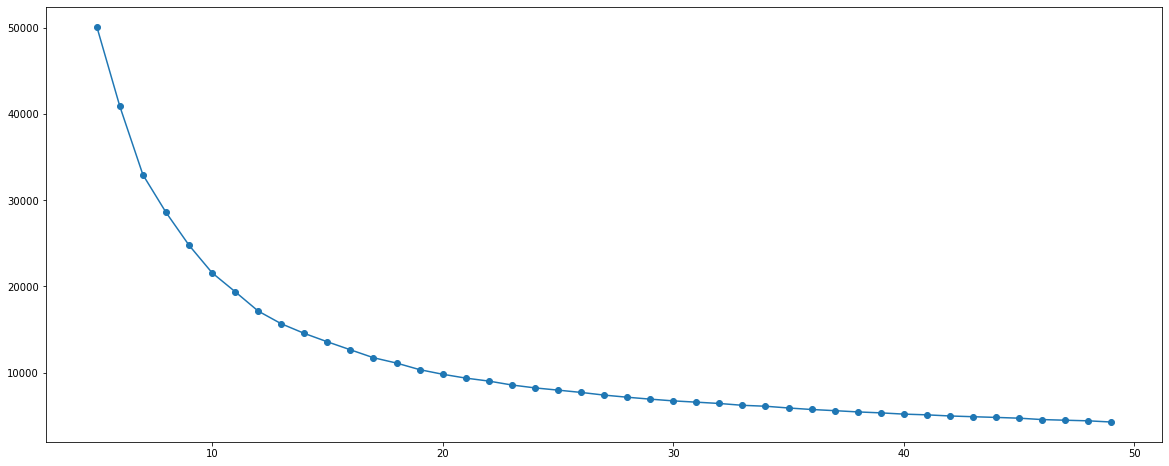

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,8))
plt.plot(k_group, digits_inertia, marker= 'o')
plt.show()


In [ ]:
kmeans.fit(features_df)

Initialization complete
Iteration 0, inertia 10233.497610492102
Iteration 1, inertia 8766.256126596007
Iteration 2, inertia 8570.046801122773
Iteration 3, inertia 8464.526509432424
Iteration 4, inertia 8396.556908944945
Iteration 5, inertia 8333.361212263955
Iteration 6, inertia 8276.6816473842
Iteration 7, inertia 8231.786222732257
Iteration 8, inertia 8191.857483686684
Iteration 9, inertia 8156.395298463794
Iteration 10, inertia 8124.910791614985
Iteration 11, inertia 8100.709441926276
Iteration 12, inertia 8079.651163852629
Iteration 13, inertia 8059.322894708635
Iteration 14, inertia 8033.920538203318
Iteration 15, inertia 8013.386226888787
Iteration 16, inertia 7992.454146912511
Iteration 17, inertia 7975.634779802214
Iteration 18, inertia 7961.001968452375
Iteration 19, inertia 7950.037701060199
Iteration 20, inertia 7939.424033378288
Iteration 21, inertia 7931.899123078462
Iteration 22, inertia 7927.6369638425795
Iteration 23, inertia 7924.09618756789
Iteration 24, inertia 7920.

Iteration 40, inertia 7967.243465124955
Iteration 41, inertia 7964.445668781562
Iteration 42, inertia 7961.328948829509
Iteration 43, inertia 7958.678658204107
Iteration 44, inertia 7956.186220408039
Iteration 45, inertia 7954.437529982346
Iteration 46, inertia 7952.838458261075
Iteration 47, inertia 7951.476038130288
Iteration 48, inertia 7950.51314979022
Iteration 49, inertia 7949.750656767462
Converged at iteration 49: center shift 0.00029940076536651925 within tolerance 0.00033183214821586515.
Initialization complete
Iteration 0, inertia 10323.512032826311
Iteration 1, inertia 8899.50083891231
Iteration 2, inertia 8713.10556648317
Iteration 3, inertia 8564.246280156807
Iteration 4, inertia 8443.835523780614
Iteration 5, inertia 8372.551879622582
Iteration 6, inertia 8321.641598238542
Iteration 7, inertia 8281.81109570806
Iteration 8, inertia 8252.442408043435
Iteration 9, inertia 8229.598330240044
Iteration 10, inertia 8210.169240944731
Iteration 11, inertia 8193.626207531932
Itera

KMeans(max_iter=1000, n_clusters=25, verbose=2)

In [ ]:
kmeans.inertia_

7912.786246739491

Análisando os 43 grupos utilizando k-means na base do california housing que todas as execuções do algoritmo convergiram com um número menor do que 40. A rodada com maior números de iterações teve 33.

Devido ao baixo número de interações, podemos entender que as nossas regiões de fronteira estão bem definidas

Inercía - 7926.227236060893

In [ ]:
print(kmeans.labels_.shape)
print(kmeans.labels_[:50])

(20640,)
[ 3  3  7 16 14  8  8  4 11  8 18  4 18 21 11 11 18 11 22 18 11 11 22 22
 18  4  4 22 11 11 22 22 22 22  4 11 11 11  4 21 11 11 11  8  4  4 11 11
 11 10]


In [ ]:
print(f'Iterações:  {kmeans.n_iter_} ')
print(f'\nInércia: {kmeans.inertia_} ')
print(f'\nCentro dos clusters: \n\n {kmeans.cluster_centers_}')

Iterações:  30 

Inércia: 7912.786246739491 

Centro dos clusters: 

 [[  2.6525297    1.38418107   6.86629454]
 [  5.13425748   1.05322349   6.49476503]
 [  3.0901375   11.53717536  55.5338291 ]
 [  7.97347697   1.01281485   6.70372971]
 [  2.9278692    1.05176167   4.5749618 ]
 [  3.92245818   2.91758508  14.72626695]
 [  3.25        29.85151515 137.22121212]
 [  7.8172839    1.09428034   8.1645004 ]
 [  3.9007605    1.03722203   5.16911034]
 [  3.20015      7.5701203   36.11203645]
 [  1.69305664   1.04647011   2.88496734]
 [  1.75859271   1.0731458    4.18343966]
 [  3.3208953    2.02359764   9.86455706]
 [  3.81182692   5.00031619  26.31650609]
 [  4.12862369   1.06823098   6.06406277]
 [  6.33871888   1.0550678    7.23453723]
 [  6.16576073   1.01315843   5.98905408]
 [  3.89130278   4.18123821  20.04960937]
 [  3.0373324    1.08080819   5.53433525]
 [  3.90081958   1.03321629   4.25162285]
 [ 14.090155     1.04305858   8.58320512]
 [  2.72712089   1.04694478   3.68410372]
 [  2.

#Aglomeração hierarquica explorando dois níveis de hierarquia

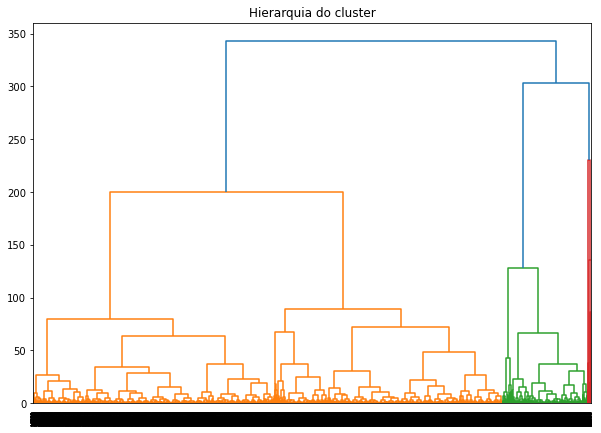

In [ ]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Hierarquia do cluster")
dend = shc.dendrogram(shc.linkage(features_df, method='ward'))

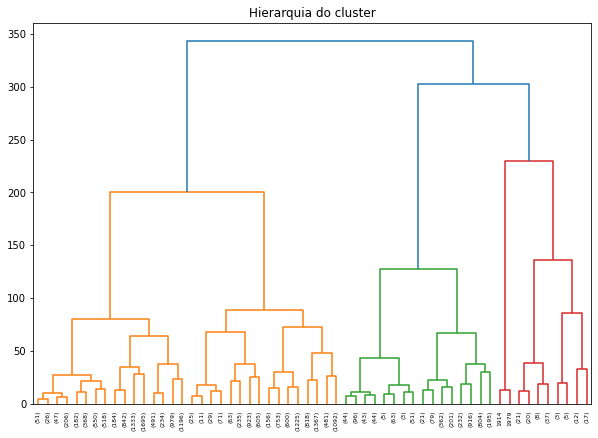

In [ ]:
#Gerando o dendrograma com menos níveis
plt.figure(figsize=(10, 7))
plt.title("Hierarquia do cluster")
dend = shc.dendrogram(shc.linkage(features_df, method='ward'), truncate_mode='level', p=5)

In [ ]:
#Executando o cluster aglomerativo para Nível 1 - 2 Grupos
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(features_df)
cluster.labels_[0:100]

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [ ]:
#Verificando como ficou o agrupamento para o cluster 
data_clustered = features_df[cluster.labels_ == 0]
data_clustered.describe()

,MedInc,AveBedrms,AveRooms
count,3284.000000,3284.000000,3284.000000
mean,6.966062,1.206179,7.772235
std,2.061697,1.126108,5.070114
min,0.499900,0.600000,3.166667
25%,5.648425,0.995556,6.445902
50%,6.466400,1.030779,6.956630
75%,7.719800,1.077653,7.610480
max,15.000100,34.066667,141.909091


In [ ]:
data_from_cluster = features_df[cluster.labels_ == 1]
data_from_cluster.describe()

,MedInc,AveBedrms,AveRooms
count,17356.000000,17356.000000,17356.000000
mean,3.284979,1.075956,4.985627
std,1.154175,0.156540,1.086993
min,0.499900,0.333333,0.846154
25%,2.398075,1.008538,4.304965
50%,3.212150,1.052492,4.996480
75%,4.107100,1.102889,5.626363
max,8.000000,3.500000,14.000000


**Para aglomeração hierarquica no nível 1:
Podemos perceber que há uma diferença expressiva no desvio padrão dos dois agrupamentos. Como também em suas médias, não causando tanto impacto a média de quartos.**

---
**Aglomeração Hierarquica no nível 2:**


In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(features_df)
cluster.labels_[0:100]

array([2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [ ]:
data_from_cluster = features_df[cluster.labels_ == 0]
data_from_cluster.describe()

,MedInc,AveBedrms,AveRooms
count,125.000000,125.000000,125.000000
mean,3.726971,5.252414,25.839292
std,1.745624,4.004995,17.835720
min,0.499900,1.750000,12.774709
25%,2.712000,3.169935,16.788462
50%,3.566700,4.105832,20.900783
75%,4.183800,5.632432,28.236842
max,15.000100,34.066667,141.909091


In [ ]:
data_from_cluster = features_df[cluster.labels_ == 1]
data_from_cluster.describe()

,MedInc,AveBedrms,AveRooms
count,17356.000000,17356.000000,17356.000000
mean,3.284979,1.075956,4.985627
std,1.154175,0.156540,1.086993
min,0.499900,0.333333,0.846154
25%,2.398075,1.008538,4.304965
50%,3.212150,1.052492,4.996480
75%,4.107100,1.102889,5.626363
max,8.000000,3.500000,14.000000


In [ ]:
data_from_cluster = features_df[cluster.labels_ == 2]
data_from_cluster.describe()

,MedInc,AveBedrms,AveRooms
count,3159.000000,3159.000000,3159.000000
mean,7.094231,1.046071,7.057331
std,1.966590,0.121728,0.895088
min,4.533300,0.600000,3.166667
25%,5.715850,0.994341,6.426593
50%,6.530800,1.028169,6.909524
75%,7.779200,1.069619,7.503223
max,15.000100,3.716418,14.706731


**No nível hierarquico 2:**

**Pude perceber que a média distoou entre os 3 agrupamentos, porém o desvio padrão teve leve similaridade entre o agrupamento 3 e 2.**

**Possivelmente, será necessário uma quantidade maior de agrupamentos para poder descrever um padrão mais fidedígno ao dataset.**


Realizando o agrupamento com os 43 clusters e gerando os gráficos para visualizá-los.

In [ ]:
cluster = AgglomerativeClustering(n_clusters=43, affinity='euclidean', linkage='ward')
cluster.fit_predict(features_df)

array([ 0,  6,  0, ..., 34, 34, 34], dtype=int64)

In [ ]:
cluster.labels_[0:100]

array([ 0,  6,  0, 12, 41, 10,  1,  4, 24,  1, 27,  4, 28, 24, 35, 24,  5,
        3, 34, 28, 35, 35, 34, 34, 28, 24, 24, 34, 35, 34, 34, 34, 18, 35,
       24, 35, 35, 15,  4, 20, 24, 15, 15,  1,  4, 24,  3, 15, 15, 25, 25,
       35, 35, 15, 35, 35, 35, 18, 35,  3,  5, 12, 18, 32,  5, 18, 35,  5,
        5, 35, 18, 15, 18, 25,  5, 15, 28, 18, 35, 24, 15, 15, 15, 25, 18,
        5, 25, 25, 15, 15, 25, 25, 15, 20,  3, 25, 20,  3, 15, 20],
      dtype=int64)

In [ ]:
#Verificando primeiro agrupamento
group1 = features_df[cluster.labels_ == 0]
group1.describe()


,MedInc,AveBedrms,AveRooms
count,563.000000,563.000000,563.000000
mean,8.008595,1.036208,7.502234
std,0.558097,0.073288,0.560234
min,6.859100,0.879245,6.400000
25%,7.587150,0.994437,7.113695
50%,7.960600,1.026515,7.434579
75%,8.392750,1.059107,7.874495
max,9.532000,1.500000,9.505155


In [ ]:
#verificando agrupamento 30
group30 = features_df[cluster.labels_ == 29]
group30.describe()

,MedInc,AveBedrms,AveRooms
count,25.000000,25.000000,25.000000
mean,3.098944,4.192655,19.953816
std,1.062828,0.882858,1.214161
min,0.499900,2.845238,17.546099
25%,2.393700,3.608355,18.977064
50%,3.125000,4.050000,20.033333
75%,3.937500,4.740000,20.939394
max,5.010000,6.000000,22.133588


In [ ]:
#verificando agrupamento 43
group43 = features_df[cluster.labels_ == 42]
group43.describe()

,MedInc,AveBedrms,AveRooms
count,12.000000,12.000000,12.000000
mean,3.163625,4.696854,23.902318
std,1.053380,0.831531,0.824653
min,2.062500,3.500000,22.228261
25%,2.175075,3.982041,23.509676
50%,2.904600,4.799336,24.009173
75%,4.070175,5.160526,24.508224
max,4.962000,6.071429,24.900000


## Análise dos grupos selecionados

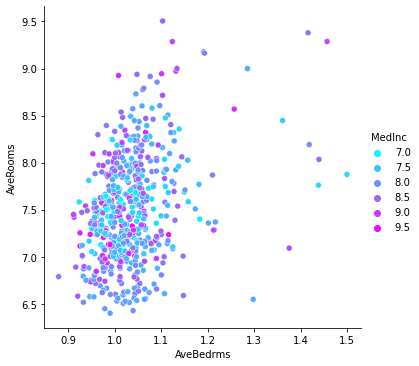

In [ ]:
#Análise do grupo 1
import seaborn as sns


sns.relplot(x='AveBedrms',
            y='AveRooms',
            hue='MedInc',
            data=group1,
            kind='scatter',
            palette='cool')




Podemos verificar que há grande dispersão entre valores e casas.Podemos entender a correlação entre MedInc e números de Quartos e Salas.

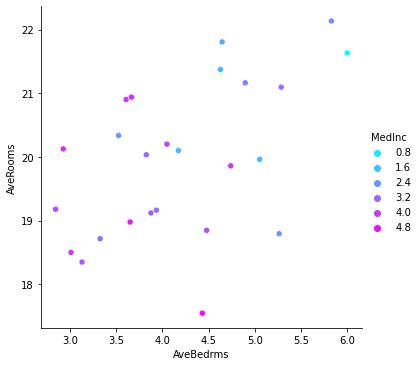

In [ ]:
#Analisando as coordenadas do cluster 30
sns.relplot(x='AveBedrms',
            y='AveRooms',
            hue='MedInc',
            data=group30,
            kind='scatter',
            palette='cool')



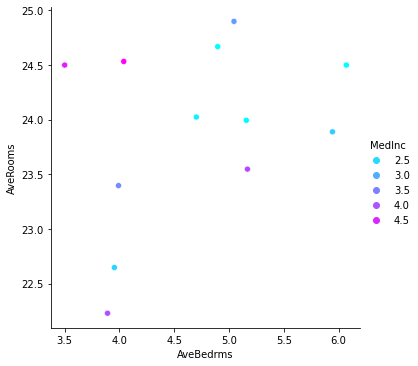

In [ ]:
#Analisando as coordenadas do cluster 3
sns.relplot(x='AveBedrms',
            y='AveRooms',
            hue='MedInc',
            data=group43,
            kind='scatter',
            palette='cool')

Podemos verificar através da análise mostrada abaixo, que grande parte dos nossoa grupamentos estão são parte da média de Income mais baixa. Além disso. Podemos perceber que, não necessariamente quem possui um Income maior possui mais cômodos

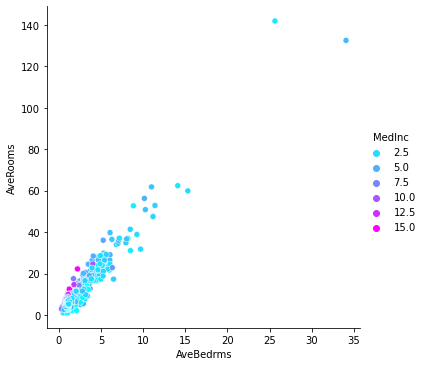

In [ ]:
sns.relplot(x='AveBedrms',
            y='AveRooms',
            hue='MedInc',
            data=features_df,
            kind='scatter',
            palette='cool')

Ressalto ainda, que o agrupamento escolhido foi ideal, baseado nos nossos parâmetros.

# Análise de componentes principais usando PCA

#Componentes Principais (PCA)


In [ ]:
from sklearn.decomposition import PCA

data_pca = c_housings_df
pca_model = PCA(n_components = 2)
pca_model.fit(data_pca)


PCA(n_components=2)

In [ ]:
#média dos dados
print('Atributos de saída do PCA:\n ')
print(f'Média: \n\n {pca_model.mean_}')
print()

Atributos de saída do PCA:
 
Média: 

 [ 3.87067100e+00  2.86394864e+01  5.42899974e+00  1.09667515e+00
  1.42547674e+03  3.07065516e+00  3.56318614e+01 -1.19569704e+02]



In [ ]:
print('<----    Atributos de saída do PCA com relação às componentes principais: ---->\n' )
print(f'Componentes principais (quantidade) {pca_model.n_components_}\n')
print('--'*50)
print(f'\nComponentes principais (dimnensões) {pca_model.components_.shape}\n', )
print('--'*50)
print(f'Matriz com componentes principais:\n \n  {pca_model.components_}\n\n', )
print('--'*50)

#Verificando atributos em relação ao dataset original
print('**'*50)
print('--'*50)
print('\n\n<----   Atributos de saída do PCA com relação ao dataset original:   ---->')
print(f'\nMédia (dimensões): {pca_model.mean_.shape}\n')
print('--'*50)
print(f'\nvetor Xm:\n\n {pca_model.mean_}\n')
print('--'*50)
print(f'\nCovariância (dimensões): {pca_model.get_covariance().shape} \n')
print('--'*50)
print(f'\nMatriz A de covariância: \n\n {pca_model.get_covariance()}', )


<----    Atributos de saída do PCA com relação às componentes principais: ---->

Componentes principais (quantidade) 2

----------------------------------------------------------------------------------------------------

Componentes principais (dimnensões) (2, 8)

----------------------------------------------------------------------------------------------------
Matriz com componentes principais:
 
  [[ 8.11734515e-06 -3.29264421e-03 -1.57754708e-04 -2.77006684e-05
   9.99994324e-01  6.40764448e-04 -2.05179008e-04  1.76522227e-04]
 [-1.98005360e-02  9.92216370e-01 -3.90115135e-02 -4.23881026e-03
   3.18858393e-03  1.15585346e-01 -3.52344718e-03 -1.38634158e-02]]


----------------------------------------------------------------------------------------------------
****************************************************************************************************
----------------------------------------------------------------------------------------------------


<----   Atributos de

In [ ]:
U = pca_model.components_   #setando dataset com os componentes
pc1, pc2 = U[0, :], U[1, :]  #realizando a divisão dos componentes para a análise

print(f'Localização com maior contribuição na componente pc1: {pc1.argmax()}\n' )
print(f'Maior valor de contribuição na pc1: {pc1.max()}\n') 
print(f'Localização com menor contribuição na componente pc1: {pc1.argmin()}\n')
print(f'Menor valor de contribuição na pc1: {pc1.min()}\n')
print('===================================ANÁLISE DO PRINCIPAL COMPONENTE 2==========================================\n')
print(f'Localização com maior contribuição na componente pc2: {pc2.argmax()}\n')
print(f'Maior valor de contribuição na pc2: {pc2.max()}\n')
print(f'Localização com menor contribuição na componente pc2: {pc2.argmin()}\n')
print(f'Menor valor de contribuição na pc2: {pc2.min()}\n')

Localização com maior contribuição na componente pc1: 4

Maior valor de contribuição na pc1: 0.9999943244522552

Localização com menor contribuição na componente pc1: 1

Menor valor de contribuição na pc1: -0.003292644212769687

===================================ANÁLISE DO PRINCIPAL COMPONENTE 2==========================================

Localização com maior contribuição na componente pc2: 1

Maior valor de contribuição na pc2: 0.9922163699796057

Localização com menor contribuição na componente pc2: 2

Menor valor de contribuição na pc2: -0.039011513519632855



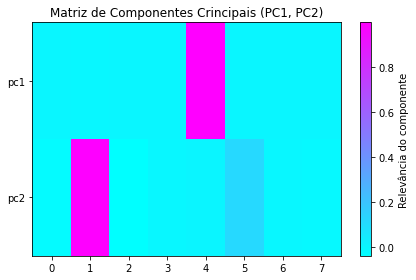

In [ ]:
# Plotar mapa de cor da matriz de componentes
import matplotlib.pyplot as plt
ax = plt.axes()

im = ax.imshow(U, cmap="cool",
               vmin=U.min(),
               vmax=U.max(),
               aspect='auto')


ax.set_yticks([0, 1])
ax.set_yticklabels(['pc1', 'pc2'])

plt.colorbar(im).ax.set_ylabel("Relevância do componente", rotation=90)
ax.set_title("Matriz de Componentes Crincipais (PC1, PC2)")
plt.tight_layout()

Segundo a análise dos componentes, verificamos que:

* PC1 -> **Componente com mais relevância** corresponde ao componente 4 do dataset original.
* PC2 -> **Componente com mais relevância** corresponde ao componente 1 do dataset original.

In [ ]:
eigenvalues = pca_model.singular_values_
print(f'Autovalores (relevância das componentes na dispersão dos dados originais): {eigenvalues} ')

Autovalores (relevância das componentes na dispersão dos dados originais): [162693.60217202   1731.78899064] 


In [ ]:
# Análise de Variabilidade do nosso modelo PCA

print(f'Variabilidade capturada pelas componentes principais: \n')
print('-'*60)
print(f'Valor absoluto: {pca_model.explained_variance_}\n')
print('-'*60)
print(f'Relativo por componente: {pca_model.explained_variance_ratio_}\n')
print('-'*60)
print(f'Variabilidade total capturada: {sum(pca_model.explained_variance_ratio_)*100:.2f}% \n')

Variabilidade capturada pelas componentes principais: 

------------------------------------------------------------
Valor absoluto: [1.28248501e+06 1.45311939e+02]

------------------------------------------------------------
Relativo por componente: [9.99789327e-01 1.13281110e-04]

------------------------------------------------------------
Variabilidade total capturada: 99.99% 



In [ ]:
pca_df = pca_model.transform(data_pca)

print('Antes da redução de dimensionalidade utilizando componentes principais, o dataset tinha 8 dimensões.')
print('-'*60)
print(f'\nDimensões antes do PCA: {data_pca.shape}', )
print(f'\nDimensões após o PCA: {pca_df.shape}', )


Antes da redução de dimensionalidade utilizando componentes principais, o dataset tinha 8 dimensões.
------------------------------------------------------------

Dimensões antes do PCA: (20640, 8)

Dimensões após o PCA: (20640, 2)


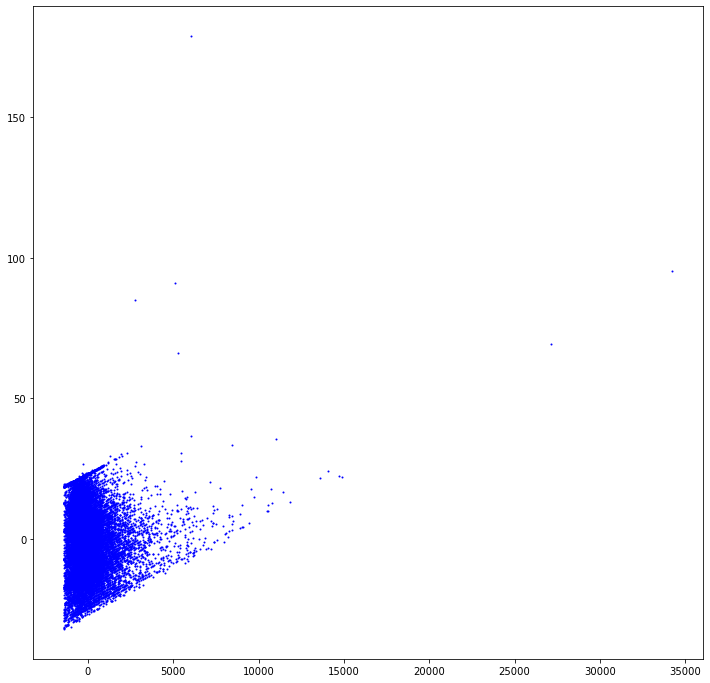

In [ ]:
#Plotando Gráfico de Componentes
plt.figure(figsize=(12,12))

plt.plot(pca_df[:, 0], #todos os dados do primeiro componente
         pca_df[:, 1], #todos os dados do segundo componente
         "bo",
         markersize=1)
plt.show()

#RECONSTRUÇÃO DOS CENTROS DOS GRUPOS NO DF ORIGINAL

Iremos reconstrir o modelo com K group igual a 7 inicalmente

In [ ]:
K_group7_model = KMeans(n_clusters=7,
                        init='k-means++',
                        max_iter=2000,
                        verbose=2)
K_group7_model.fit(pca_df)

Initialization complete
Iteration 0, inertia 2381357017.407007
Iteration 1, inertia 2009667506.2708094
Iteration 2, inertia 1960638748.3519442
Iteration 3, inertia 1950836731.4784005
Iteration 4, inertia 1944339873.8631938
Iteration 5, inertia 1938859390.5416443
Iteration 6, inertia 1934957750.9770277
Iteration 7, inertia 1931683394.7774894
Iteration 8, inertia 1928745679.942733
Iteration 9, inertia 1926637572.6924603
Iteration 10, inertia 1924983149.2225072
Iteration 11, inertia 1923883003.1195264
Iteration 12, inertia 1922985048.5872798
Iteration 13, inertia 1922273204.0499487
Iteration 14, inertia 1921528154.85796
Iteration 15, inertia 1920894124.5584261
Iteration 16, inertia 1920261477.83637
Iteration 17, inertia 1919703506.038288
Iteration 18, inertia 1919289183.58947
Iteration 19, inertia 1918914438.3961868
Iteration 20, inertia 1918562374.9588776
Converged at iteration 20: center shift 58.734198007521115 within tolerance 64.12840911050405.
Initialization complete
Iteration 0, in

Iteration 39, inertia 2205100963.4523306
Iteration 40, inertia 2188493032.991968
Iteration 41, inertia 2181561650.6858234
Iteration 42, inertia 2173902430.6873035
Iteration 43, inertia 2166023780.8860283
Iteration 44, inertia 2159822347.9032965
Iteration 45, inertia 2155711193.2863336
Iteration 46, inertia 2152962717.8954916
Iteration 47, inertia 2151043909.046378
Iteration 48, inertia 2149506224.5652156
Iteration 49, inertia 2148073363.9423394
Iteration 50, inertia 2147048410.2201655
Iteration 51, inertia 2146115434.9794755
Iteration 52, inertia 2145336452.1213908
Iteration 53, inertia 2144894577.5670385
Iteration 54, inertia 2144485576.3946576
Iteration 55, inertia 2144062429.1346598
Iteration 56, inertia 2143645406.7205048
Iteration 57, inertia 2143282460.2914748
Iteration 58, inertia 2143017567.7357712
Converged at iteration 58: center shift 55.157969653566326 within tolerance 64.12840911050405.
Initialization complete
Iteration 0, inertia 2351651528.788624
Iteration 1, inertia 203

KMeans(max_iter=2000, n_clusters=7, verbose=2)

In [ ]:
K_group7_model.inertia_

1918310999.189268

In [ ]:
K_group7_model.cluster_centers_

array([[-2.82133580e+02,  8.82931025e-01],
       [ 3.18036021e+03, -1.11913475e+00],
       [ 1.45476724e+03, -2.31740845e+00],
       [ 6.84337335e+03,  7.22969972e+00],
       [-8.53869063e+02,  5.10748704e-01],
       [ 3.06984042e+04,  8.22555387e+01],
       [ 4.02236302e+02, -1.38858432e+00]])

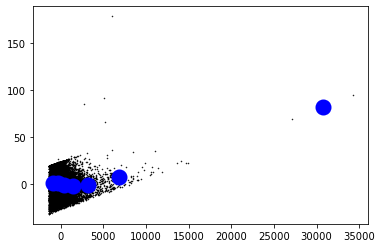

In [ ]:
plt.plot(pca_df[:, 0],
         pca_df[:, 1],
         "k.",
         markersize=1)

centroids_kg_7 = K_group7_model.cluster_centers_

plt.scatter(centroids_kg_7[:, 0],
    centroids_kg_7[:, 1],
    marker="o",
    s=169,
    linewidths=3,
    color="b",
    zorder=10)
plt.show()

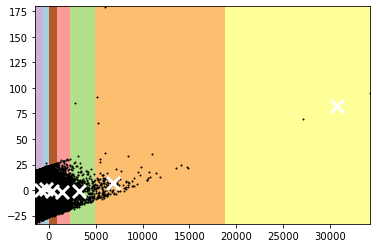

In [ ]:
import numpy as np
# Put the result into a color plot
h = 0.2
x_min, x_max = pca_df[:, 0].min() - 1, pca_df[:, 0].max() + 1
y_min, y_max = pca_df[:, 1].min() - 1, pca_df[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = K_group7_model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="Nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(pca_df[:, 0],
         pca_df[:, 1],
         "k.",
         markersize=2)


centroids = K_group7_model.cluster_centers_

plt.scatter(centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10)
plt.show()

Como podemos obvservar com o gráfico acima, existem regioões de fontreira.

In [ ]:
centroids_origin_dims = pca_model.inverse_transform(centroids)
print(f'Dimensões dos centróides antes da transformada inversa: {centroids.shape}')
print(f'Dimensões dos centróides depois da transformada inversa: {centroids_origin_dims.shape}')

Dimensões dos centróides antes da transformada inversa: (7, 2)
Dimensões dos centróides depois da transformada inversa: (7, 8)


# DESAFIO

Foi escolhido o **Mean Shift** (AGRUPAMENTO)

A Mean-Shift é uma técnica de Clustering (agrupamento) na qual tem como objetivo inferir a média dos clusters de acordo com uma função de densidade, na qual em uma janela de interesse (range de dados que compreende o círculo) de faz o cálculo da área em que há mais densidade, e nesse ponto será determinado o ponto central da Mean-Shift e o círculo de interesse se move até esse novo ponto central. Esse processo é realizado de forma sucessiva e só termina quando a Mean-Shift é igual a inferência anterior.

São basicamente 3 passos: (1) estimar a densidade, (2) encontrar a moda da densidade, e (3) associar cada ponto a uma moda.

Esse tipo de função de densidade é mais utilizada em processamento de imagens; mas também pode ser muito útil na análise visual de clusters em qualquer número de dimensões, na qual podem ser feitas análises para 1) detecção de anomalias (outliers), 2) identificação de padrões de outliers, e 3) através de um determinado range (janela de interesse) segmentar e concentrar as análises no ponto de maior densidade  e dentro desse espectro (Mean-Shift e Janela de Interesse) realizar segmentações e ações específicas de acordo com esses dados.

Esse tipo de estudo com Mean-Shift na análise de clusters em mineração de dados, auxilia a determinar espectros de analises em grupos com melhores segmentações e similaridades e com o ‘corte‘ determinado pela janela de interesse.

Um ponto negativo nessa abordagem, é que nem precisa olhar muito para ver que o custo computacional é alto, tornando-se inviável para grandes conjuntos de dados;

In [ ]:
from sklearn.cluster import MeanShift

In [ ]:
MS_DF = c_housings_df[['MedInc', 'AveBedrms','AveRooms']]
MSClustering = MeanShift(bandwidth=5)
MSClustering.fit(MS_DF)
MSC_Labels = MSClustering.labels_
MSC_centros = MSClustering.cluster_centers_
MSC_n_clusters = len(np.unique(MSC_Labels))

print(f'Através do métdodo Mean Shift estima-se que há {MSC_n_clusters} disponíveis.')

Através do métdodo Mean Shift estima-se que há 8 disponíveis.


Como podemos notar, o Mean Shift aproxima-se do número de agrupamentos ideal do Kmeans.
 Eu ainda estimaria um ideal de 7 agrupamentos caso fosse utilizar a metodologia Kmeans++
 


In [ ]:
MSC_centros

array([[  3.66570761,   1.06689268,   5.19217312],
       [  3.4149    ,   7.3148317 ,  36.89401938],
       [  3.28186   ,  10.37475835,  52.03218212],
       [  2.7706    ,  13.47453704,  61.36990741],
       [ 15.0001    ,   2.22222222,  22.22222222],
       [ 10.2948    ,   4.04635762,  24.62582781],
       [  4.625     ,  34.06666667, 132.53333333],
       [  1.875     ,  25.63636364, 141.90909091]])

In [ ]:
MS_DF

,MedInc,AveBedrms,AveRooms
0,8.3252,1.023810,6.984127
1,8.3014,0.971880,6.238137
2,7.2574,1.073446,8.288136
3,5.6431,1.073059,5.817352
4,3.8462,1.081081,6.281853
...,...,...,...
20635,1.5603,1.133333,5.045455
20636,2.5568,1.315789,6.114035
20637,1.7000,1.120092,5.205543
20638,1.8672,1.171920,5.329513
